## Bu projede makine hataları için sınıflandırma yaptık.

## import libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import Yusuf2  ## my module
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import resample  ## bağımlı değişkenlerdeki fark çok olduğu için kullandık.
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data = pd.read_csv('train.csv')

## EDA - Exploratory Data Analysis

In [3]:
train_data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [5]:
train_data.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [6]:
train_data.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train_data.describe(include = object)

,Product ID,Type
count,136429,136429
unique,9976,3
top,L53257,L
freq,139,95354


## gorsellestirme

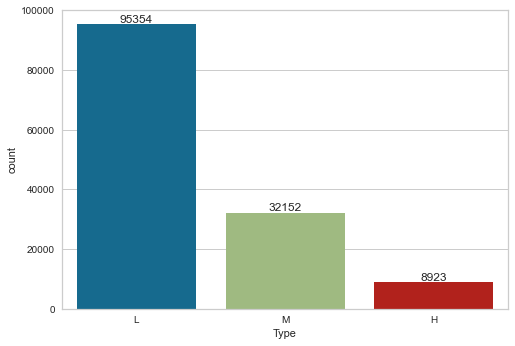

In [8]:
ax = sbn.countplot(x = train_data.Type)
ax.bar_label(ax.containers[0]);

In [9]:
train_data.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [10]:
columns = ['Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]']

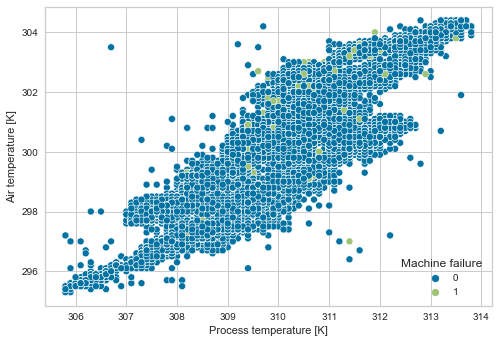

In [12]:
sbn.scatterplot(data = train_data, x = columns[0], y = 'Air temperature [K]', hue = 'Machine failure')
plt.show();

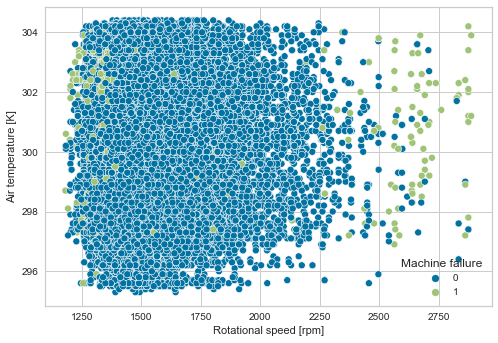

In [13]:
sbn.scatterplot(data = train_data, x = columns[1], y = 'Air temperature [K]', hue = 'Machine failure')
plt.show();

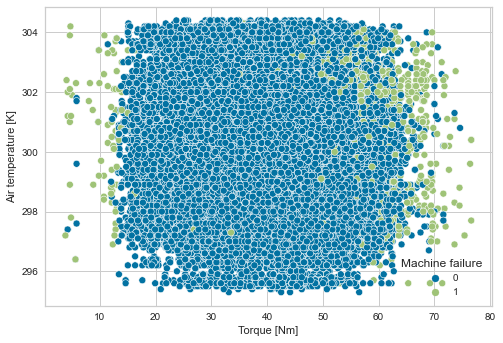

In [14]:
sbn.scatterplot(data = train_data, x = columns[2], y = 'Air temperature [K]', hue = 'Machine failure')
plt.show();

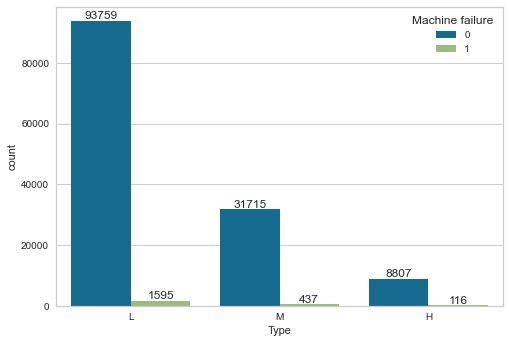

In [15]:
ax = sbn.countplot(x = train_data.Type, hue = train_data['Machine failure'])
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);

## sampling

In [17]:
sifir = train_data[train_data['Machine failure'] == 0]
bir = train_data[train_data['Machine failure'] == 1]
undersample = resample(sifir, replace = False, n_samples = len(bir), random_state = 42)
train_df = pd.concat([bir, undersample])

In [19]:
train_df.shape, train_data.shape

((4296, 14), (136429, 14))

In [22]:
train_df.reset_index(drop = True, inplace = True)
train_df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,130,L52498,L,303.9,312.8,1345,56.5,21,1,0,0,0,0,0
1,164,L51721,L,302.5,310.4,1307,54.8,174,1,0,1,0,0,0
2,228,M17895,M,300.7,309.7,1878,27.9,20,1,0,0,0,0,0
3,236,L55926,L,297.3,308.6,1258,61.8,144,1,0,0,0,1,0
4,247,L51801,L,303.0,311.3,1341,51.0,174,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,85964,H36468,H,300.8,310.6,1790,26.0,139,0,0,0,0,0,0
4292,49208,M21957,M,300.6,310.2,1772,27.1,23,0,0,0,0,0,0
4293,122028,M23114,M,299.0,310.4,1515,37.0,131,0,0,0,0,0,0
4294,19120,L53141,L,300.3,310.7,1427,46.3,190,0,0,0,0,0,0


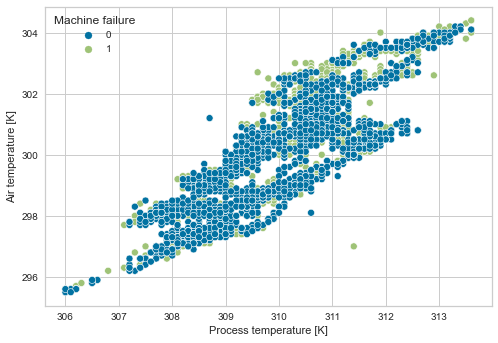

In [23]:
sbn.scatterplot(data = train_df, x = columns[0], y = 'Air temperature [K]', hue = 'Machine failure')
plt.show();

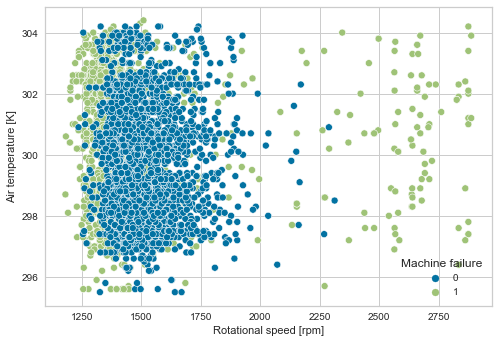

In [24]:
sbn.scatterplot(data = train_df, x = columns[1], y = 'Air temperature [K]', hue = 'Machine failure')
plt.show();

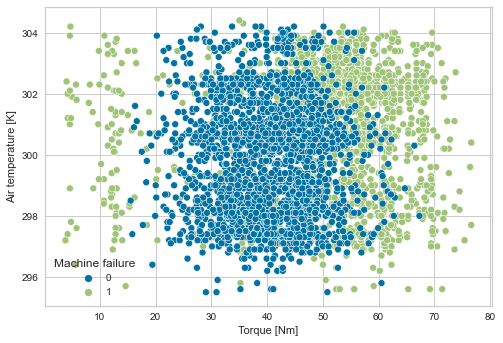

In [25]:
sbn.scatterplot(data = train_df, x = columns[2], y = 'Air temperature [K]', hue = 'Machine failure')
plt.show();

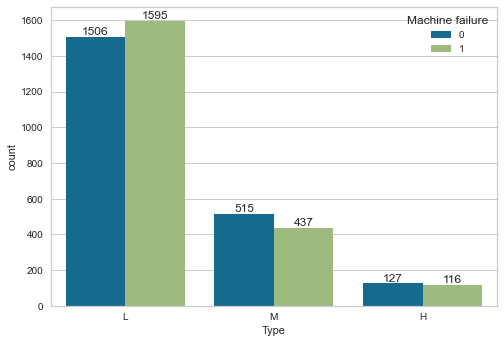

In [26]:
ax = sbn.countplot(x = train_df.Type, hue = train_df['Machine failure'])
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);

            Accuracy
Random     91.744186
Gradient   91.627907
Hist       91.627907
AdaBoost   91.511628
Bagging    90.581395
Support    90.465116
Logistic   90.232558
XGBoost    90.000000
Bernoulli  87.790698
Decision   86.976744
Gaussian   52.558140


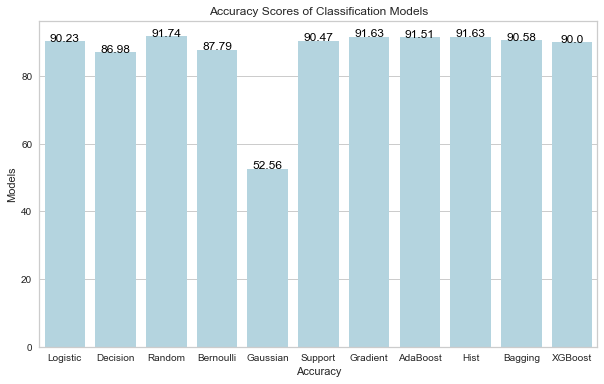

In [28]:
Yusuf2.boslari_doldur_siniflandirma(train_df, 'machine_failure')

## RandomForest model

In [31]:
y = train_df['machine_failure']
x = train_df.drop('machine_failure', axis = 1)

In [32]:
x = pd.get_dummies(x, drop_first = True)
x

,air_temperature_[k],process_temperature_[k],rotational_speed_[rpm],torque_[nm],tool_wear_[min],twf,hdf,pwf,osf,rnf,type_L,type_M
0,303.9,312.8,1345,56.5,21,0,0,0,0,0,1,0
1,302.5,310.4,1307,54.8,174,0,1,0,0,0,1,0
2,300.7,309.7,1878,27.9,20,0,0,0,0,0,0,1
3,297.3,308.6,1258,61.8,144,0,0,0,1,0,1,0
4,303.0,311.3,1341,51.0,174,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4291,300.8,310.6,1790,26.0,139,0,0,0,0,0,0,0
4292,300.6,310.2,1772,27.1,23,0,0,0,0,0,0,1
4293,299.0,310.4,1515,37.0,131,0,0,0,0,0,0,1
4294,300.3,310.7,1427,46.3,190,0,0,0,0,0,1,0


In [35]:
test_data = pd.read_csv('test.csv')
test_id = test_data['id']
Yusuf2.sadece_boslari_doldur(test_data)
test_data

,type,air_temperature_[k],process_temperature_[k],rotational_speed_[rpm],torque_[nm],tool_wear_[min],twf,hdf,pwf,osf,rnf
0,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
90949,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [37]:
test_data = pd.get_dummies(test_data, drop_first = True)

In [38]:
model = RandomForestClassifier()
model.fit(x, y)
tahmin = model.predict(test_data)
tahmin

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
sonuc = pd.DataFrame(columns = ['id', 'Machine failure'])
sonuc['id'] = test_id
sonuc['Machine failure'] = tahmin
sonuc

,id,Machine failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0
...,...,...
90949,227378,0
90950,227379,0
90951,227380,0
90952,227381,0


In [40]:
sonuc.to_csv('submission.csv', index = False)